In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_frame = pd.read_csv("nigeria_messy_sales_dataset.csv")

In [109]:
print(data_frame.head(10))

     Customer Name    State     Product  Units Sold  Unit Price  Total Sale  \
0              NaN   rivers    KEYBOARD         NaN         NaN         NaN   
1     Allison Hill    Lagos  Headphones         NaN   267992.94         NaN   
2      Noah Rhodes  Anambra    Keyboard         NaN    42364.41         NaN   
3  Angie Henderson    Delta    Keyboard         NaN   279444.94         NaN   
4    Daniel Wagner    Delta      Tablet         NaN    95899.74         NaN   
5  Cristian Santos      Oyo      Camera         NaN   118189.90         NaN   
6  Connie Lawrence   Rivers      Tablet        36.0   185141.90   6665108.4   
7  Abigail Shaffer      Imo    Keyboard         NaN   252859.28         NaN   
8       Gina Moore     Kano      CAMERA         NaN   178320.53         NaN   
9  Gabrielle Davis  plateau      Tablet         NaN   152440.84         NaN   

    Sale Date Sales Channel                              Order ID  
0  2025-04-27        Online                                   

In [110]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  507 non-null    object 
 1   State          550 non-null    object 
 2   Product        550 non-null    object 
 3   Units Sold     155 non-null    float64
 4   Unit Price     495 non-null    float64
 5   Total Sale     137 non-null    float64
 6   Sale Date      550 non-null    object 
 7   Sales Channel  444 non-null    object 
 8   Order ID       510 non-null    object 
dtypes: float64(3), object(6)
memory usage: 38.8+ KB
None


In [111]:
print("(rows and columns):" , data_frame.shape)

(rows and columns): (550, 9)


In [112]:
print("len(rows) of the data frame" , len(data_frame))

len(rows) of the data frame 550


Detect and remove duplicate records from the dataset to ensure data integrity.If duplicates exist, they are dropped in-place; otherwise, a message confirms data uniqueness.

In [113]:
duplicates = data_frame[data_frame.duplicated()]

if not duplicates.empty:
    print("data having dups")
    data_frame.drop_duplicates(inplace=True)
else:
    print("No Dups")

No Dups


Identify and count the number of missing (null) values in each column to assess data completeness and determine if cleaning or imputation is required.

In [114]:
all_nulls = data_frame.isnull().sum()
print(all_nulls)

Customer Name     43
State              0
Product            0
Units Sold       395
Unit Price        55
Total Sale       413
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64


Check for and handle missing values in the dataset.If null values exist, fill categorical fields ('Customer Name', 'Sales Channel') with descriptive placeholders, and replace numeric fields ('Units Sold', 'Unit Price') with their median values to maintain data consistency. Also, recalculate any missing 'Total Sale' entries based on available unit and price data. Ensures the dataset is clean, consistent, and ready for further analysis.

In [4]:
lst_all_nulls = data_frame[data_frame.isnull()]

if not lst_all_nulls.empty:
    print("data have null values")
    for col in data_frame[["Customer Name", "Sales Channel"]]:
        mode_value = data_frame[col].mode()[0]  
        data_frame[col] = data_frame[col].fillna(mode_value)
    for coll in data_frame[["Units Sold" , "Unit Price"]]:
        data_frame[coll] = data_frame[coll].fillna(data_frame[coll].median()).astype(int)
    data_frame["Total Sale"].fillna((data_frame["Units Sold"] * data_frame["Unit Price"]).astype(int))
    print("Removing Null values.........wait")
    print("--------ALL DONE--------")
else:
    print("No Nulls")

data have null values
Removing Null values.........wait
--------ALL DONE--------


Custome add the Order ID for easy understanding

In [116]:
data_frame.insert(loc=0 , column="order id" , value=[i for i in range(1 , len(data_frame)+1)])

Again check if the Null Values are present or not

In [117]:
all_nulls = data_frame.isnull().sum()
print(all_nulls)

order id          0
Customer Name     0
State             0
Product           0
Units Sold        0
Unit Price        0
Total Sale        0
Sale Date         0
Sales Channel     0
Order ID         40
dtype: int64


In [118]:
data_frame.to_csv("Organized_dataset.csv" , index=False)

In [119]:
data_frame = pd.read_csv("Organized_dataset.csv")

Convert the 'Sale Date' column to datetime format for accurate date-based operations,
sort the dataset chronologically to ensure proper time sequence analysis,
and extract the unique sale years to identify the range of transaction periods.

In [120]:
data_frame["Sale Date"] = pd.to_datetime(data_frame["Sale Date"])
data_frame = data_frame.sort_values(by="Sale Date")
years = data_frame["Sale Date"].dt.year.unique()
print(years)

[2023 2024 2025]


Aggregate total sales by year to analyze annual revenue trends, grouping data by the year component of 'Sale Date' and summing all 'Total Sale' values.

In [121]:
yearly_sales = data_frame.groupby(data_frame["Sale Date"].dt.year )["Total Sale"].sum()
print(yearly_sales)

Sale Date
2023    8.082804e+08
2024    2.206724e+09
2025    1.025248e+09
Name: Total Sale, dtype: float64


 Count the total number of orders placed each year by grouping data on the 'Sale Date' year, providing insight into yearly order volume and business growth trends.

In [122]:
orders_per_year =  data_frame.groupby(data_frame["Sale Date"].dt.year )["order id"].count()
print(orders_per_year)

Sale Date
2023    113
2024    296
2025    141
Name: order id, dtype: int64


 Calculate the average sale value per order each year to evaluate changes in customer spending behavior.

In [123]:
avg_sale_per_order = data_frame.groupby(data_frame["Sale Date"].dt.year)["Total Sale"].mean()
print("\nAverage Sale Value per Order (Yearly):")
print(avg_sale_per_order)


Average Sale Value per Order (Yearly):
Sale Date
2023    7.152924e+06
2024    7.455148e+06
2025    7.271261e+06
Name: Total Sale, dtype: float64


Analyze total sales by month to identify seasonal trends and peak sales periods.


In [124]:
monthly_sales = data_frame.groupby(data_frame["Sale Date"].dt.to_period("M"))["Total Sale"].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
Sale Date
2023-07    5.980012e+07
2023-08    1.747471e+08
2023-09    8.768056e+07
2023-10    2.155744e+08
2023-11    1.497323e+08
2023-12    1.207460e+08
2024-01    1.496324e+08
2024-02    1.692816e+08
2024-03    2.471926e+08
2024-04    1.737405e+08
2024-05    1.990476e+08
2024-06    8.240853e+07
2024-07    2.537115e+08
2024-08    1.957373e+08
2024-09    2.173149e+08
2024-10    1.976430e+08
2024-11    1.456314e+08
2024-12    1.753824e+08
2025-01    1.918755e+08
2025-02    1.575137e+08
2025-03    1.573229e+08
2025-04    1.662857e+08
2025-05    1.374068e+08
2025-06    1.298432e+08
2025-07    8.500005e+07
Freq: M, Name: Total Sale, dtype: float64


 Identify the year with the highest total revenue to highlight top business performance.

In [125]:
top_year = yearly_sales.idxmax()
top_sales_value = yearly_sales.max()
print(f"\nTop Performing Year: {top_year} with total sales of {top_sales_value:.2f}")


Top Performing Year: 2024 with total sales of 2206723778.28


Calculate the year-over-year percentage change in total sales to measure growth trends.


In [126]:
sales_growth = yearly_sales.pct_change() * 100
print("\nYear-over-Year Sales Growth (%):")
print(sales_growth)


Year-over-Year Sales Growth (%):
Sale Date
2023           NaN
2024    173.014618
2025    -53.539819
Name: Total Sale, dtype: float64


Measure the percentage growth or decline in total order volume each year.


In [127]:
orders_growth = orders_per_year.pct_change() * 100
print("\nYear-over-Year Order Growth (%):")
print(orders_growth)


Year-over-Year Order Growth (%):
Sale Date
2023           NaN
2024    161.946903
2025    -52.364865
Name: order id, dtype: float64


Combine yearly totals for sales, order count, and average order value into a single summary table for better comparison.


In [128]:
summary = pd.DataFrame({
    "Total Sales": yearly_sales,
    "Total Orders": orders_per_year,
    "Avg Sale per Order": avg_sale_per_order
}, index=years)
summary.index.name = "Year"
print("\nYearly Summary:")
print(summary)


Yearly Summary:
       Total Sales  Total Orders  Avg Sale per Order
Year                                                
2023  8.082804e+08           113        7.152924e+06
2024  2.206724e+09           296        7.455148e+06
2025  1.025248e+09           141        7.271261e+06


 This code visualizes the total yearly sales using a bar chart. It sets the figure size, plots sales data with a blue color palette, adds a title and axis labels for clarity, enables horizontal grid lines for easier value comparison, and finally displays the chart.

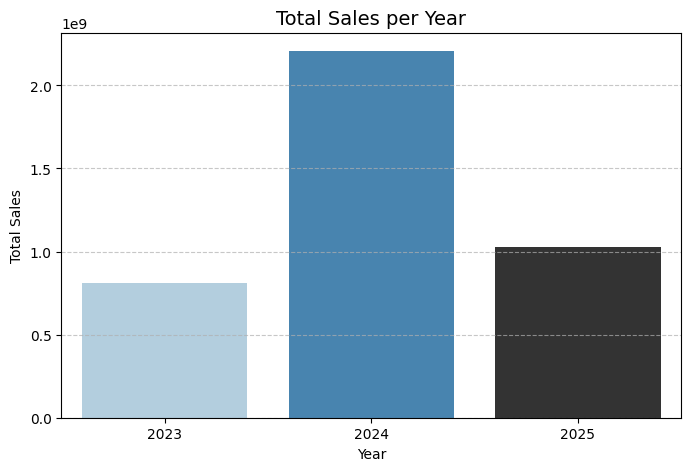

In [129]:
plt.figure(figsize=(8,5))
sns.barplot(x=yearly_sales.index, 
            y=yearly_sales.values, 
            hue=yearly_sales.index,  
            palette="Blues_d", 
            legend=False)            
plt.title("Total Sales per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

This code creates a bar chart that shows the total number of orders per year. It sets the figure size, applies a green color palette for better visualization, adds a title and axis labels for clarity, includes horizontal grid lines to make values easier to compare, and finally displays the chart.

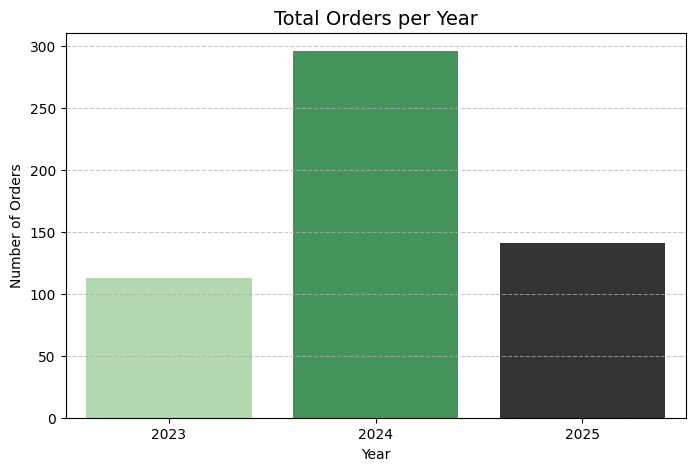

In [130]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=orders_per_year.index,
    y=orders_per_year.values,
    hue=orders_per_year.index,   
    palette="Greens_d",
    legend=False                
)
plt.title("Total Orders per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


This code generates a line chart that illustrates the monthly sales trend. It sets the figure size, plots the sales data with circular markers and a purple line for clear visualization, adds a descriptive title and axis labels, includes dashed grid lines for easier value tracking, and finally displays the chart.

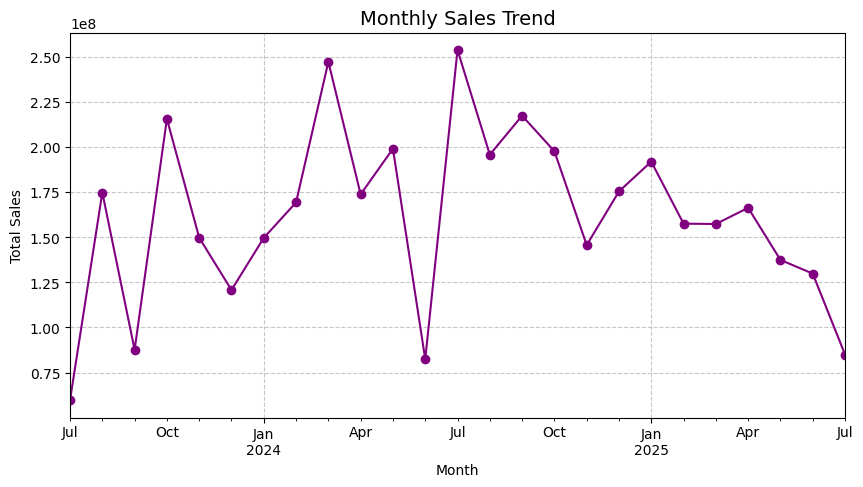

In [131]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

This code creates a pie chart showing how total sales are distributed by year, using different colors, percentage labels, and a title for clarity.

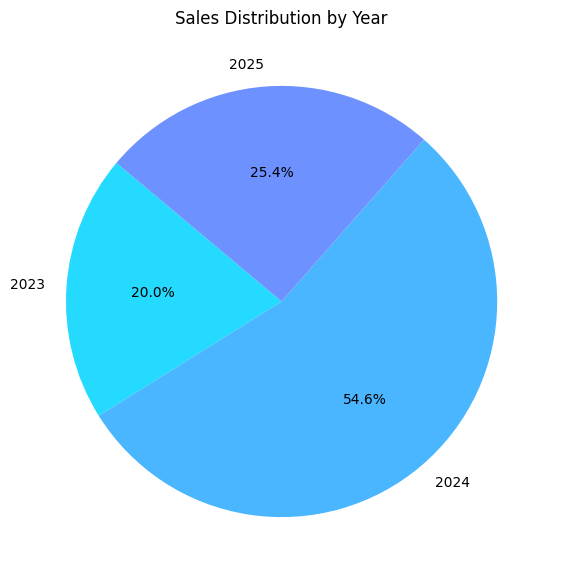

In [132]:
plt.figure(figsize=(7,7))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool"))
plt.title("Sales Distribution by Year")
plt.show()

This code calculates total sales for each month from the dataset, ensures the months are in chronological order, and sets up a bar plot with a figure size of 10x5 inches. It also prepares the plot to avoid future warnings by correctly handling color palettes and hue settings.

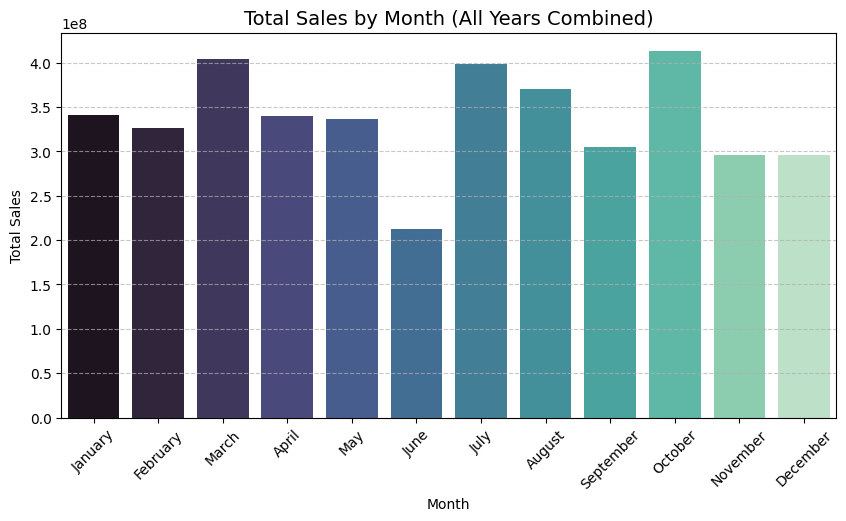

In [133]:
data_frame["Month"] = data_frame["Sale Date"].dt.month_name()

monthly_sales_all = data_frame.groupby("Month")["Total Sale"].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,5))
sns.barplot(
    x=monthly_sales_all.index,
    y=monthly_sales_all.values,
    hue=monthly_sales_all.index,     
    palette="mako",
    legend=False
)
plt.title("Total Sales by Month (All Years Combined)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

This code finds the top 10 customers by total sales and shows their purchases in a horizontal bar chart with different colors, a title, labels, and grid lines for easy reading.

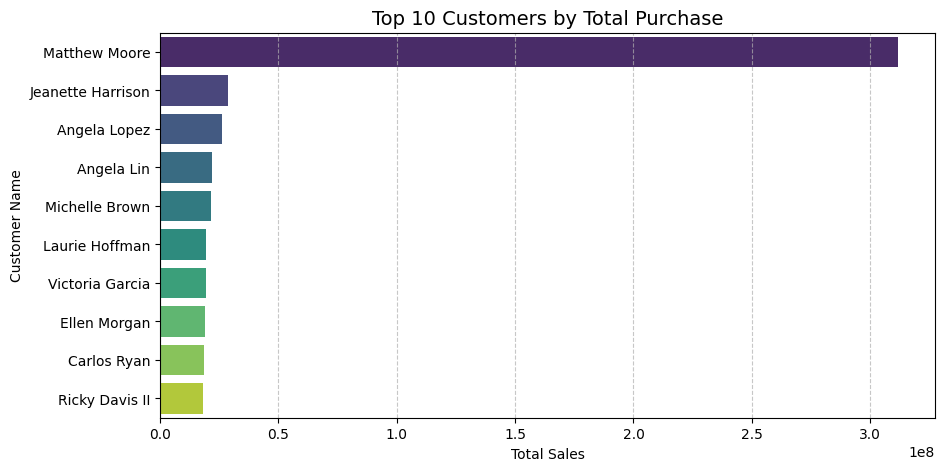

In [137]:
top_customers = data_frame.groupby("Customer Name")["Total Sale"].sum().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_customers.values,
    y=top_customers.index,
    hue=top_customers.index,     
    palette="viridis",
    legend=False
)
plt.title("Top 10 Customers by Total Purchase", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

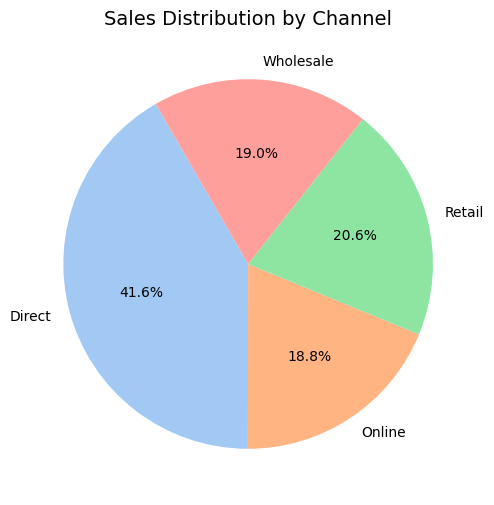

In [142]:
channel_sales = data_frame.groupby("Sales Channel")["Total Sale"].sum()

plt.figure(figsize=(6,6))
plt.pie(channel_sales, labels=channel_sales.index, autopct="%1.1f%%", startangle=120,
        colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Channel", fontsize=14)
plt.show()


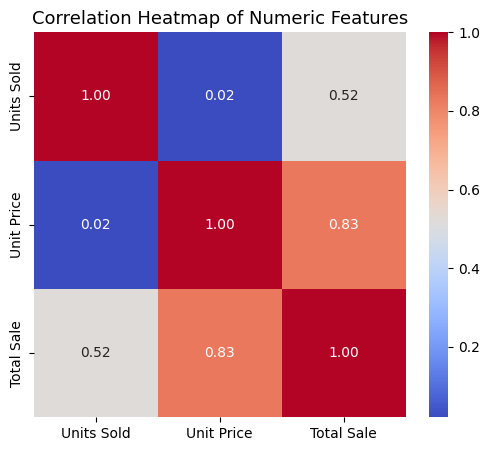

In [143]:
plt.figure(figsize=(6,5))
sns.heatmap(data_frame[["Units Sold", "Unit Price", "Total Sale"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=13)
plt.show()